# Example of evolution operator for the Lecture 4 (Introduction to QC)

**Given:**

Consider the initial state:
$$
\left| \psi_0 \right\rangle = \left[ \begin{matrix} 0\\1 \end{matrix} \right]
$$
The Hamiltonian of the system is:
$$
\hat{H} = \left[ \begin{matrix} 0 & -i\\ i & 0 \end{matrix} \right]
$$

In [1]:
# Importing the libraries
#numpy library for the actions with matrices
import math
import numpy as np
#importing the matrix exponentiation function
from scipy.linalg import expm
from numpy.linalg import matrix_power
#importing constants
import scipy.constants as const
#importing library for graphs
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# setting up the initial state
psi_0 = np.array([[0],[1]])
print("psi_0 = \n"+str(psi_0))

psi_0 = 
[[0]
 [1]]


$$
\psi_0 = \left[ \begin{matrix} 0\\1 \end{matrix} \right]
$$

In [3]:
# setting up the Hammiltonian
H = np.array([[0,-1j],[1j,0]])
print("H = \n"+str(H))

H = 
[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]


$$H = \left[\begin{matrix} 0 & -i \\ i & 0 \end{matrix}\right]$$

Let's check if the $\hat{H}$ is Hermitian matrix:
$$
\hat{H}^\dagger = \left(\hat{H}^*\right)^T = \hat{H}
$$

In [4]:
Hdagger = np.transpose(np.conjugate(H))
print("Hdagger - H = \n"+str(Hdagger - H))

Hdagger - H = 
[[ 0.-0.j  0.+0.j]
 [-0.+0.j  0.-0.j]]


$$
H - H^{\dagger} = \left[ \begin{matrix} 0 & 0\\ 0 & 0 \end{matrix} \right]
$$

In [5]:
# Building the power series formula
# Defining the matrix
A = np.array([[0, -1],[1, 0]])


a0 = matrix_power(A, 0)
#print(a0)
a1 = matrix_power(A, 1)
#print(a1)
a2 = matrix_power(A, 2)/math.factorial(2)
#print(a2)
a3 = matrix_power(A, 3)/math.factorial(3)
#print(a3)
a4 = matrix_power(A, 4)/math.factorial(4)
#print(a4)
a5 = matrix_power(A, 5)/math.factorial(5)
#print(a5)
a6 = matrix_power(A, 6)/math.factorial(6)
#print(a6)
a = a0 + a1 + a2 + a3 + a4 + a5 + a6

print("Power series formula:")
print(a)
print("The Scipy implementation:")
print(expm(A))

Power series formula:
[[ 0.54027778 -0.84166667]
 [ 0.84166667  0.54027778]]
The Scipy implementation:
[[ 0.54030231 -0.84147098]
 [ 0.84147098  0.54030231]]


In [6]:
# Question 3 in Tutorial Handout - Defining Hamiltonian and Matrix Exponential
# Building the power series formula
# Defining the matrix
Ham_phi = np.array([[3.8*1.6*1e-19, -2.2*1.6*1e-19],[-2.2*1.6*1e-19, 3.8*1.6*1e-19]])

print("The implementation:")
print(expm((-1j*U*1e-15)/(const.hbar)))

The implementation:


NameError: name 'U' is not defined

$$
\exp \left[ \begin{matrix} 0 & -1\\ 1 & 0 \end{matrix} \right] \approx \left[ \begin{matrix} 1 & 0\\ 0 & 1 \end{matrix} \right] + \left[ \begin{matrix} 0 & -1\\ 1 & 0 \end{matrix} \right] + \frac{1}{2!}\left[ \begin{matrix} 0 & -1\\ 1 & 0 \end{matrix} \right]^2 + \frac{1}{3!}\left[ \begin{matrix} 0 & -1\\ 1 & 0 \end{matrix} \right]^3 + \frac{1}{4!}\left[ \begin{matrix} 0 & -1\\ 1 & 0 \end{matrix} \right]^4+ \frac{1}{5!}\left[ \begin{matrix} 0 & -1\\ 1 & 0 \end{matrix} \right]^5+ \frac{1}{6!}\left[ \begin{matrix} 0 & -1\\ 1 & 0 \end{matrix} \right]^6
$$

## Task 1. Define the Evolution operator

Assuming that $\hbar = 1$ we can build the evolution operator as:
$$
\hat{U} = \exp \left[ -it \hat{H}  \right]
$$

In [ ]:
# Function of the evolution operator:
def Evolution(Hmatrix,t):
  return( expm(-1j*t*Hmatrix) )

Checking if $\hat{U}$ is **unitary**:
$$
\hat{U} \hat{U}^\dagger = I
$$
assume that $t = 1$

In [ ]:
# Checking if the evolution operator is unitary
print(np.matmul(Evolution(H,1),np.transpose(np.conjugate(Evolution(H,1)))) - np.identity(2))

[[ 0.00000000e+00+0.j  1.16841633e-16+0.j]
 [ 1.16841633e-16+0.j -1.11022302e-16+0.j]]


## Task 2. Calculating how the initial state is changing with time.
$$
\left| \psi(t) \right\rangle = \hat{U}\left| \psi_0 \right\rangle
$$

In [ ]:
t = np.linspace(0,6,50)
psi = []
for tt in t:
    psi.append(np.matmul(Evolution(H,tt),psi_0))
psi = np.array(psi)

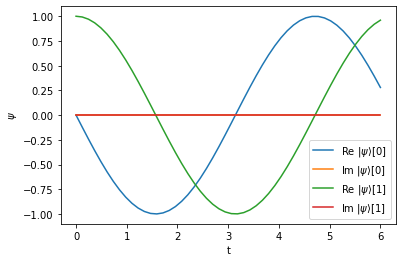

In [ ]:
# Indexing into the 0 entry and the 1 entry for the state vector Psi
plt.plot(t, np.real(psi[:,0]), label = "Re $|\\psi\\rangle[0]$")
plt.plot(t, np.imag(psi[:,0]), label = "Im $|\\psi\\rangle[0]$")
plt.plot(t, np.real(psi[:,1]), label = "Re $|\\psi\\rangle[1]$")
plt.plot(t, np.imag(psi[:,1]), label = "Im $|\\psi\\rangle[1]$")
plt.legend()
plt.xlabel("t")
plt.ylabel("$\\psi$")
plt.show()

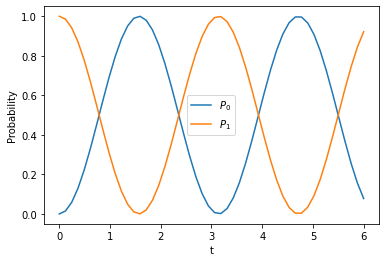

In [ ]:
plt.plot(t, np.abs(psi[:,0])**2, label = "$P_0$")
plt.plot(t, np.abs(psi[:,1])**2, label = "$P_1$")
plt.legend()
plt.xlabel("t")
plt.ylabel("Probability")
plt.show()